# Setting up Paths

In [1]:
#path to the data
pathCOMPASOutput = '/home/cneijssel/Documents/Projects/Data/CosmicInt/'
#path to compasrepo which contains ther popsynth folder
pathRepo = '/home/cneijssel/Documents/COMPASpop'
pathPostProcessing = '/home/cneijssel/Documents/COMPASpop/popsynth/Papers/NeijsselEtAL/PostProcessing'


# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append(pathRepo + '/popsynth/Papers/NeijsselEtAL/CosmicIntegration/Scripts')
sys.path.append(pathPostProcessing+'/2_CosmicIntegration')

# Custom Imports from COMPASrepo

In [3]:
import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
import coencodeVarious as CV



# The current options for MSSFR

In [4]:
ZMs   = ['Ma et al. (2015)',\
         'Langer et al. (2006)', \
         'Langer et al. +offset (2006)']
GSMFs = ['Panter et al. (2004) Single', \
         'Furlong et al. (2015) Single', \
         'Furlong et al. (2015) Double']
SFRs  = ['Madau et al. (2014)',
         'Strolger et al. (2004)']       
            #Also have Madau 2017 , but not taken into account here

# The Cosmic integrator class

In [5]:
#Again I make a generic instance without DCO type
#will need to set this manually with the MSSFR later

#Want to show cosmic scale so high redshift
#Large number of shells for smooth lines
minz = 0.
maxz = .6
resz = 100
Data = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput,\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz)

Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()

cannot set 2D-array of rates
COMPAS data is empty (COMPAS.setCOMPASData) 


In [6]:
# General settings colours DCO types consistent with other notebooks
Types      = ['BBH', 'BHNS', 'BNS']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]

BBH
The detected rate of the outermost redshift shell is nonzero, did we integrate far enough?
rate BBH at redshift 0 for Preferred model  = 0.0036725261099974462
The detected rate of the outermost redshift shell is nonzero, did we integrate far enough?
rate BBH at redshift 0 for Barrett et al. (2018) MSSFR  = 0.03252100344139489
The detected rate of the outermost redshift shell is nonzero, did we integrate far enough?
rate BBH at redshift 0 for Furlong et al. (2015) Single  = 0.040825861242867884
The detected rate of the outermost redshift shell is nonzero, did we integrate far enough?
rate BBH at redshift 0 for Ma et al. (2015)  = 0.004579222802300569
BHNS
rate BHNS at redshift 0 for Preferred model  = 0.0014523638892925505
rate BHNS at redshift 0 for Barrett et al. (2018) MSSFR  = 0.006933400754005697
rate BHNS at redshift 0 for Furlong et al. (2015) Single  = 0.006657823130161928
rate BHNS at redshift 0 for Ma et al. (2015)  = 0.002343165308637627
BNS
rate BNS at redshift 0 for Pre

/home/cneijssel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:106: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


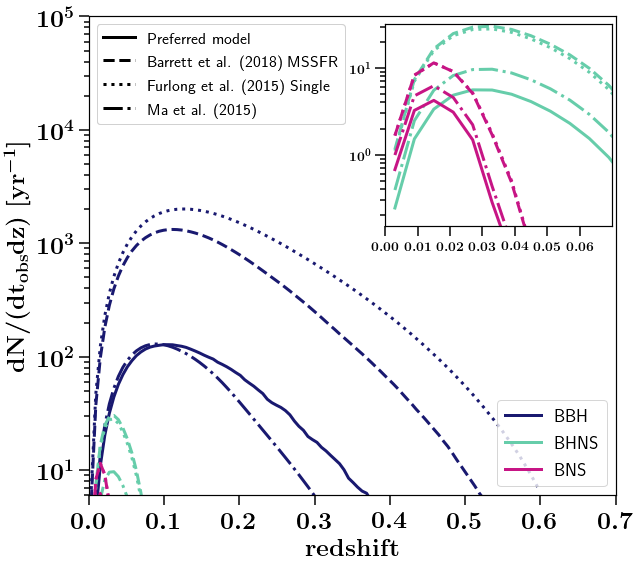

In [13]:
#The distribution of DCOs as a function of redshift

method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'Ma et al. (2015)']


cm       = plt.get_cmap('viridis')
nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]



#Setting DCO types takes the longest so first loop
#over types, then variations
fig, axes = plt.subplots(1,1,figsize=(9,8))
ax2 = plt.axes([.6, .6, .35, .35])
handles1  = []
for nrT, Type in enumerate(Types):
    print(Type)
    Data.COMPAS.setCOMPASDCOmask(types=Type)
    Data.COMPAS.setCOMPASData()
    Data.setBirthTimesAnd2Darrays()
    for nrL, L in enumerate(labels):
        Data.MSSFR.Zprescription         = method[nrL]
        Data.MSSFR.SFRprescription       = SFRs[nrL]
        Data.MSSFR.logNormalPrescription = logNormal[nrL]
        Data.MSSFR.GSMFprescription      = GSMFs[nrL]
        Data.MSSFR.ZMprescription        = MZs[nrL]
        Data.cosmologicalIntegration()
        
        DCOperRedshift = np.sum(Data.PerSystemPerRedshift_ratesObserved, axis=1)
        Redshifts      = Data.Shell_centerRedshift
        dz             = Data.Shell_dz
        NrPerZ         = np.divide(DCOperRedshift, dz)
        print('rate %s at redshift 0 for %s  = %s' \
              %(Type, L, DCOperRedshift[0]))
        #only want a label for DCO type  once when we have solid line
        #if nrL != 3: #Dont Ma et al for clarity
        if nrL == 0:
            label = Type
            ll    = True
        else:
            label = None
            ll    = False
        if ll:
            l = axes.plot(Redshifts, NrPerZ, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes.plot(Redshifts, NrPerZ, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL])

        if Type != 'BBH':
            ax2.plot(Redshifts, NrPerZ, label=label,lw=3.,\
             c=Colours[nrT], linestyle=linestyles[nrL])
        #if (nrL == 3) and (Type =='BBH'): #Dont Ma et al for clarity
        #    print '?'
        #    if nrL == 0:
        #        label = Type
        #        ll    = True
        #    else:
        #        label = None
        #        ll    = False
        #    if ll:
        #        l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
        #             c=Colours[nrT], linestyle=linestyles[nrL])
        #        handles1.extend(l)
        #    else:
        #        axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
        #             c=Colours[nrT], linestyle=linestyles[nrL])
                
ax2.set_xlim(0,0.07)
ax2.set_ylim(bottom=0.15)
ax2.set_yscale('log')
ticks = ax2.get_xticks()
ax2.set_xticks(ticks[:-1])
axes.set_xlim(0,0.7)
axes.set_ylim(bottom=6, top=100000)
axes.set_yscale('log')
axes
first_legend = axes.legend(handles=handles1, loc=4,  prop={'size':18}, ncol=1)   
axes.add_artist(first_legend) 

handles2 = []
for nrL, L in enumerate(labels):
    l = axes.plot([0,2], [-1,-1], c='k', linestyle=linestyles[nrL], label=L, lw=3.)
    handles2.extend(l)
second_legend = axes.legend(handles=handles2, loc=2,  prop={'size':16}, ncol=1)#, bbox_to_anchor=(1., .45))   
axes.add_artist(second_legend) 


nameX = r'$\rm redshift $'
nameY = r'$\rm dN/(dt_{obs}dz)\ [ yr^{-1}]  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
ax2 = CV.layoutAxes(ax2, nameX='', nameY='',  fontsize=14)
axes.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('./TotalMergerRateRedshiftObs.png', dpi=300, transparent=False)
plt.show()
plt.close()

#it will give warnings for BBH given that maximum redshift of detectable mergers is around 0.8
#Given that this is for plotting not actual rates it is of no concern :)